<a href="https://colab.research.google.com/github/jiwonlee-0218/colab/blob/main/Week_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6 Assignment: Deep Learning tutorial, Prevent overfit

-------------

## 0 .data 업로드 / 확인 / 전처리

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x, y), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


이전 mnist처럼 shape이 (data개수 = 60000개, 가로 pixel 수 = 28, 세로 pixel 수 = 28) 입니다.

In [ ]:
x.shape

(60000, 28, 28)

In [ ]:
y.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

각 class와 숫자가 아래와 같이 연결되어 있습니다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

9 == Ankle boot


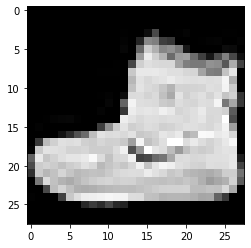

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 


index = 0 # index 설정에 따라 원하는 data를 골라서 그릴 수 있고 / 0~59999까지 대입 가능합니다.
print(str(y[index]) + ' == ' + str(class_names[y[index]]))
img = x[index]
plt.imshow(img, cmap='gray')

---------

## <font color="blue"> Question 1
    
**문제:** y와 y_test에 one-hot encoding을 하시오.

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y[0]

9

In [ ]:
x = x.astype('float32')           #0~255사이의 숫자를 인자값으로 가지고 있음
x_test = x_test.astype('float32')

x /= 255                          #0~1사이로 맞춰주기 위해서
x_test /= 255

### START CODE HERE ### (≈ 2 line of code)
y = to_categorical(y,10)
y_test = to_categorical(y_test,10)
### END CODE HERE ###

In [ ]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
import numpy as np

assert(np.sum(y) == 60000) # assert에서 error가 일어나지 않아야 정답입니다.

----------

## 미리 split하고 진행한다.

1) 매번 split 되는 data를 일정하게 하려고 random_state 값도 고정으로 설정했다.

2) data를 정교하게 split하려고 'stratify=y'를 사용해서 각 class가 같은 비율로 split 되게 했다.

In [ ]:
np.unique(y, axis=0) # y의 종류를 표현하는 함수로 y의 행 중 존재하는 값들만 중복없이 출력 -> 그래서 10개이다.  # axis=0이면 행을 기준으로한다

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y.shape

(60000, 10)

In [ ]:
x[0] # [[28개 즉 하나의이미지의 첫번째 줄],...,[28개 즉 28번째 줄]] 28개가 존재 , 1번째 이미지를 나타낸다

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
y[0] # 9번 label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 1/2, random_state = 3, stratify=y)

In [ ]:
y_val.shape

(30000, 10)

In [ ]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
np.sum(y_val, axis=0) # 'stratify=y' 덕분이다.  # 행끼리 더한다 즉 행이 삭제되고 열만 남는다 #각 카테고리마다 3000개씩 들어가있는것을 볼 수 있다.

array([3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000.], dtype=float32)

In [ ]:
np.sum(y_train,axis=0)    #각 카테고리마다 3000개씩 들어가있는것을 볼 수 있다.

array([3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000.], dtype=float32)

-------

### <font color="red"> 정확한 비교를 위해서는 dropout, regularizer 이외에는 다른 요인을 바꾸지 않는 것이 좋다.
    
#### <font color="red"> (모델의 층과 unit 개수, activation 등 다른 hyperparameter는 바꾸려면 3개 모델을 같이 바꿔야한다.)

# 1. 기본 모델

## <font color="blue"> Question 2
    
**문제:** 해당 조건에 맞는 모델을 만드시오
    
**조건:** 
    
1) 1번째 layer는 dense가 아닌 flatten하는 과정을 가진다. (parameter를 가지는 layer는 아니다.)
    
2) 2번째 layer는 unit이 32, activation은 'relu'이다.

3) 3번째 layer는 unit이 64, activation은 'relu'이다.
    
4) 4번째 layer는 unit이 128, activation은 'relu'이다.
    
5) 5번째 layer는 multiclass classification의 output layer의 규칙에 맞게 만든다.
(단, optimizer는 adam으로 설정하고 metric(s)은 'accuracy'만 사용한다.)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten

In [ ]:
def basic_model():
    model = Sequential()
    ### START CODE HERE ### (≈ 6 line of code)
    model.add(Flatten(input_shape=(28,28)))    # Flatten layer는 batch_size는 제외하고 flatten을 진행합니다. 1d array로 변화시키는 것, 
    model.add(Dense(units=32,activation='relu'))
    model.add(Dense(units=64,activation='relu'))
    model.add(Dense(units=128,activation='relu'))
    model.add(Dense(units=10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    ### END CODE HERE ###
    return model


In [ ]:
model_basic = basic_model()

# 이 부분에서 error가 날 경우 다시 Question 2를 푸시오.
assert(len(model_basic.layers)==5)
assert(len(model_basic.weights)==8)
assert(len(model_basic.weights[4].numpy())==64)

In [ ]:
model_basic.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


-------------

## <font color="blue"> Question 3
    
**문제:** 해당 조건에 맞게 train 하시오.
    
1) 3-way holdout을 맨 위에서 split한 data(x_train, y_train, x_val, y_val)을 이용해서 진행

2) epochs은 20으로 설정한다.

In [ ]:
x_train.shape

(30000, 28, 28)

In [ ]:
y_train.shape

(30000, 10)

In [ ]:
### START CODE HERE ### (≈ 1 line of code)
history_basic = model_basic.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=20)
### END CODE HERE ###

Epoch 1/20
938/938 [==============================] - 4s 3ms/step - loss: 0.8185 - accuracy: 0.7118 - val_loss: 0.4779 - val_accuracy: 0.8263
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4330 - accuracy: 0.8434 - val_loss: 0.3915 - val_accuracy: 0.8573
Epoch 3/20
938/938 [==============================] - 2s 3ms/step - loss: 0.3890 - accuracy: 0.8561 - val_loss: 0.3810 - val_accuracy: 0.8619
Epoch 4/20
938/938 [==============================] - 2s 3ms/step - loss: 0.3609 - accuracy: 0.8654 - val_loss: 0.3768 - val_accuracy: 0.8598
Epoch 5/20
938/938 [==============================] - 2s 3ms/step - loss: 0.3426 - accuracy: 0.8743 - val_loss: 0.3814 - val_accuracy: 0.8606
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3187 - accuracy: 0.8810 - val_loss: 0.3738 - val_accuracy: 0.8664
Epoch 7/20
938/938 [==============================] - 2s 3ms/step - loss: 0.3075 - accuracy: 0.8867 - val_loss: 0.3901 - val_accuracy: 0.8631
Epoch 

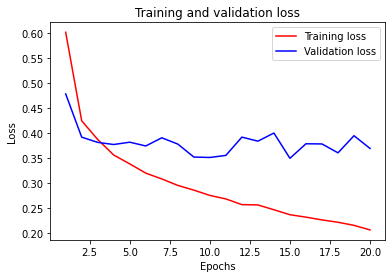

In [ ]:
loss = history_basic.history['loss']
val_loss = history_basic.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

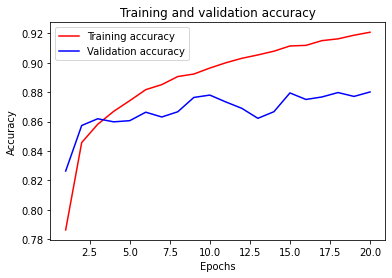

In [ ]:
acc = history_basic.history['accuracy']
val_acc = history_basic.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()             # training은 높은반면 둘의 차이가 굉장히 크므로 overfitting이라고 볼 수 있다

-----------------

# 2. Regularizer

공식문서: https://keras.io/regularizers/

## <font color="blue"> Question 4
    
**문제:** 해당 조건에 맞는 모델을 만드시오.
    
1) 위의 model_basic(Question 2)과 똑같은 구조로 모델을 만든다.

2) L2 regularizer를 unit이 64인 부분과 128인 부분에 각각 λ(람다)를 0.001로 설정한다.

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
def regularizer_model():
    model = Sequential()
    ### START CODE HERE ### (≈ 6 line of code)
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(units=32,activation='relu'))
    model.add(Dense(units=64,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(units=128,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(units=10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    ### END CODE HERE ###
    return model

In [ ]:
model_rgrz = regularizer_model()

# 이 부분에서 error가 날 경우 다시 Question 4를 푸시오.
assert(len(model_rgrz.layers)==5)
assert(len(model_rgrz.weights)==8)
assert(len(model_rgrz.weights[4].numpy())==64)

In [ ]:
model_rgrz.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


-----------

## <font color="blue"> Question 5
    
**문제:** 해당 조건에 맞게 train 하시오. (Question 3와 동일하게 train)
    
1) 3-way holdout을 맨 위에서 split한 data(x_train, y_train, x_val, y_val)을 이용해서 진행

2) epochs은 20으로 설정한다.

In [ ]:
### START CODE HERE ### (≈ 1 line of code)
history_regularizer = model_rgrz.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=20)
### END CODE HERE ### 

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.9305 - accuracy: 0.6965 - val_loss: 0.5386 - val_accuracy: 0.8369
Epoch 2/20
938/938 [==============================] - 2s 3ms/step - loss: 0.5172 - accuracy: 0.8392 - val_loss: 0.4751 - val_accuracy: 0.8519
Epoch 3/20
938/938 [==============================] - 2s 3ms/step - loss: 0.4551 - accuracy: 0.8565 - val_loss: 0.4501 - val_accuracy: 0.8593
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4212 - accuracy: 0.8674 - val_loss: 0.4414 - val_accuracy: 0.8545
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3901 - accuracy: 0.8728 - val_loss: 0.4399 - val_accuracy: 0.8556
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3752 - accuracy: 0.8775 - val_loss: 0.4311 - val_accuracy: 0.8581
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3594 - accuracy: 0.8813 - val_loss: 0.4049 - val_accuracy: 0.8657
Epoch 

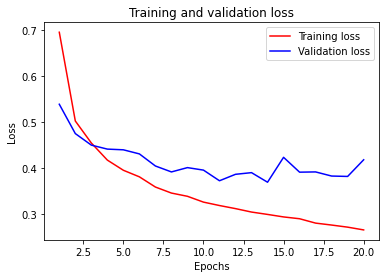

In [ ]:
loss = history_regularizer.history['loss']
val_loss = history_regularizer.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()              #regularization으로는 효과가 없는걸 알 수 있다

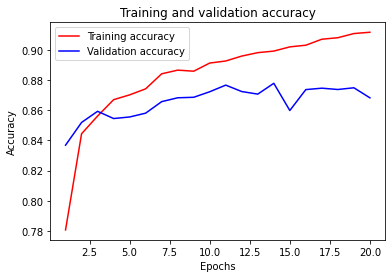

In [ ]:
acc = history_regularizer .history['accuracy']
val_acc = history_regularizer .history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

-------------

# 3. Dropout

## <font color="blue"> Question 6
    
**문제:** 해당 조건에 맞는 모델을 만드시오.
    
1) 위의 model_basic(Question 2)과 똑같은 구조로 모델을 만든다.

2) Dropout을 unit이 64인 부분에 0.3을, 적용 128인 부분에 0.5를 적용한다.

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
def dropout_model():
    model = Sequential()
    ### START CODE HERE ### (≈ 8 line of code)
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(units=32,activation='relu'))
    model.add(Dense(units=64,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    ### END CODE HERE ###
    return model

In [ ]:
model_dpt = dropout_model()

# 이 부분에서 error가 날 경우 다시 Question 6를 푸시오.
assert(len(model_dpt.layers)==7)
assert(len(model_dpt.weights)==8)
assert(len(model_dpt.weights[4].numpy())==64)

In [ ]:
model_dpt.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

----------

## <font color="blue"> Question 7
    
**문제:** 해당 조건에 맞게 train 하시오. (Question 3와 동일하게 train)
    
1) 3-way holdout을 맨 위에서 split한 data(x_train, y_train, x_val, y_val)을 이용해서 진행

2) epochs은 20으로 설정한다.

In [ ]:
### START CODE HERE ### (≈ 1 line of code)
history_dropout = model_dpt.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=20)
### END CODE HERE ###

Epoch 1/20
938/938 [==============================] - 4s 3ms/step - loss: 1.1522 - accuracy: 0.5723 - val_loss: 0.4889 - val_accuracy: 0.8276
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5439 - accuracy: 0.8070 - val_loss: 0.4359 - val_accuracy: 0.8430
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4651 - accuracy: 0.8360 - val_loss: 0.4093 - val_accuracy: 0.8547
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4368 - accuracy: 0.8450 - val_loss: 0.3875 - val_accuracy: 0.8628
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4068 - accuracy: 0.8574 - val_loss: 0.3827 - val_accuracy: 0.8634
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3892 - accuracy: 0.8629 - val_loss: 0.3749 - val_accuracy: 0.8641
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3813 - accuracy: 0.8654 - val_loss: 0.4027 - val_accuracy: 0.8552
Epoch 

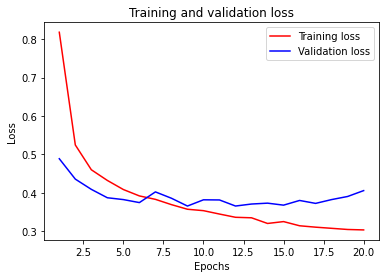

In [ ]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()       

plt.show()

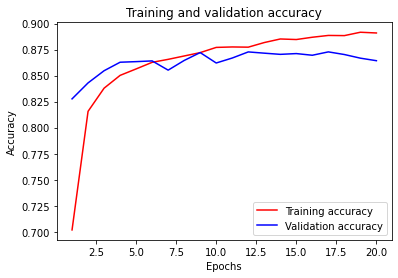

In [ ]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

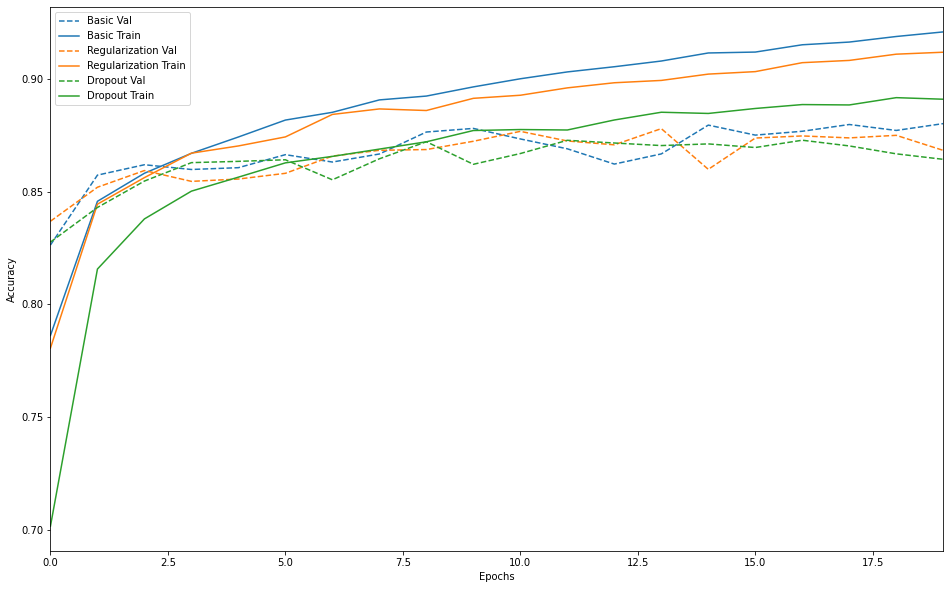

In [ ]:
plot_history([('basic', history_basic),
              ('regularization', history_regularizer),
              ('dropout', history_dropout)])

#### <font color="orange"> overfitting이 없어지긴 했으나 생각만큼 performance가 좋지 않을 것입니다. dropout의 accuracy가 낮다
    
#### <font color="orange"> 그 이유는 무엇일까요? 

#### train데이터 반만 사용하고 나머지를 val에 사용하면 underfit이 일어날 수도있다
    

#### <font color="red"> 과제를 다 해결하셨다면 밑의 ...을 클릭해서 그 이유를 보시기 바랍니다.

    
#### <font color="orange"> 현재 상황은 overfit보다는 underfit에 가깝고 underfit을 해결하는 것이 우선이기 때문입니다. (C2 W1 L3)
    
#### <font color="orange"> 프로젝트 하실 때 overfit보다 underfit이 심한데 dropout과 같은 기법을 우선으로 쓰는 경우들이 많습니다.
    
#### <font color="orange"> 꼭 underfit일 때는 그에 맞는 전략을 먼저 사용해야 합니다.
    
#### <font color="orange"> underfit을 해결하는 전략은 7주차 수업 때 배우게 됩니다.

In [ ]:
import numpy as np

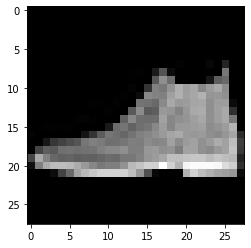

In [ ]:
plt.imshow(x_test[0], cmap='gray')

In [ ]:
model_dpt.predict(x_test[0])   #x_text.shape은 (10000,28,28) 3darray

ValueError: ignored

In [ ]:
y_train.shape

(30000, 10)

In [ ]:
x_train.shape

(30000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_test[0].shape  # 0번째 위치한 이미지의 모양은 28*28 이다. 데이터샘플이 하나니까 생략된 것이다. 

(28, 28)

In [ ]:
np.expand_dims(x_test[0],axis=0).shape

(1, 28, 28)

In [ ]:
x_test[0]

In [ ]:
a = model_dpt.predict(np.expand_dims(x_test[0],axis=0))
a # 얘가 a[L]이고 y^이다. Z[L].shape=(현재노드의 갯수 = class갯수,m) 인데 현재는 x_test[0]만 하므로 m=1이다

array([[1.28404825e-08, 9.96692165e-07, 6.73345255e-08, 1.37940219e-08,
        1.24598344e-07, 4.89431340e-03, 7.78776439e-08, 1.04083896e-01,
        2.39915494e-07, 8.91020358e-01]], dtype=float32)

In [ ]:
np.sum(a)

1.0000001

In [ ]:
np.max(a)

0.89102036

In [ ]:
np.argmax(a)

9